# Workshop on Tensorflow
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/2d/Tensorflow_logo.svg" align = "center">


## Importing dependencies

1. [Tensorflow](https://www.tensorflow.org/)
2. [Numpy](https://www.numpy.org/)
3. [Matplotlib](https://matplotlib.org)
4. [OS](https://docs.python.org/3/library/os.html)
5. [Pandas](https://pandas.pydata.org/)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"
import pandas as pd
%matplotlib inline

print("Tensorflow version =",tf.__version__)
print(tf.test.is_gpu_available())

ImportError: No module named 'tensorflow'

In [6]:
## constant variables 0 dimensional
x = tf.constant(2.0)
y = tf.constant(3.0)

## basic addition operation
z = x + y

## creating tensorflow session
sess = tf.Session()

## running the tensorflow session
print(sess.run(z))

## closing session


5.0


In [7]:
## vector of integers
z_arr = tf.constant([1,2,3,4])

sess = tf.Session()
print(sess.run(z_arr))
sess.close()

[1 2 3 4]


In [15]:
inp = 50 * np.random.rand(50, 1)
out = 1.24 * inp + 21.23 + 6 * np.random.rand(50, 1)
print(inp.shape)
print(out.shape)

(50, 1)
(50, 1)


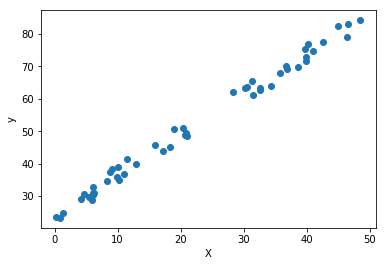

In [16]:
plt.scatter(inp, out)
plt.xlabel("X")
plt.ylabel("y")

In [17]:
X = tf.placeholder(dtype = tf.float32, shape = [None, 1])
y = tf.placeholder(dtype = tf.float32, shape = [None, 1])
weights = {}
W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
b = tf.get_variable(dtype = tf.float32, name = "bias", shape = [1], initializer = tf.initializers.random_normal)

ValueError: Variable weight already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-9-3656b024b7ee>", line 4, in <module>
    W = tf.get_variable(dtype = tf.float32, name = "weight", shape = [1], initializer = tf.initializers.random_normal)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/home/vaibagga/.conda/envs/tensorflow/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):


In [18]:
def getPrediction(W, X, b):
    return W*X + b

In [23]:
def loss(X, y):
    return tf.losses.mean_squared_error(getPrediction(X), y)

In [24]:
cost = loss(X, y)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()

TypeError: getPrediction() missing 2 required positional arguments: 'X' and 'b'

In [21]:
with tf.Session() as sess:
    sess.run(init)
    for num_iter in range(100):
        sess.run(optimizer, feed_dict = {X: inp, y: out})
        if num_iter % 10 == 0:
            cost = sess.run(cost, feed_dict = {X: inp, y: out})
            print(cost)
        
        
    

773343.0


TypeError: Fetch argument 773343.38 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

In [8]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)


11493376/11490434 [==============================] - 3s 0us/step
Epoch 1/5
60000/60000 [==============================] - 16s 271us/step - loss: 0.2204 - acc: 0.9336
Epoch 2/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.0975 - acc: 0.9700
Epoch 3/5
60000/60000 [==============================] - 16s 275us/step - loss: 0.0700 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 17s 276us/step - loss: 0.0523 - acc: 0.9831
Epoch 5/5
10000/10000 [==============================] - 1s 61us/step


[0.062021961623919195, 0.98099999999999998]